Using the Breast Cancer Wisconsin (Diagnostic) Data Set, this analysis employs sklearn's multilayer perceptron classifier and tensorflow's Deep Neural Network classifier to predict whether cancer is benign or malignant.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
import tensorflow as tf
from tensorflow import keras
%matplotlib inline

## Data import & evaluation

In [2]:
# Import dataset and create dataframe
data = pd.read_csv('bdata.csv')
# view column headers
print(data.columns)

Index(['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'diagnosis'],
      dtype='object')


In [3]:
# See number of rows + columns in data file
print("Dimension of data: {}".format(data.shape))

Dimension of data: (569, 23)


In [4]:
# Overview of column content
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 23 columns):
id                        569 non-null int64
radius_mean               569 non-null float64
texture_mean              569 non-null float64
perimeter_mean            569 non-null float64
area_mean                 569 non-null float64
smoothness_mean           569 non-null float64
compactness_mean          569 non-null float64
concavity_mean            569 non-null float64
concave points_mean       569 non-null float64
symmetry_mean             569 non-null float64
fractal_dimension_mean    569 non-null float64
radius_se                 569 non-null float64
texture_se                569 non-null float64
perimeter_se              569 non-null float64
area_se                   569 non-null float64
smoothness_se             569 non-null float64
compactness_se            569 non-null float64
concavity_se              569 non-null float64
concave points_se         569 non-null float64
symm

In [5]:
# View first five rows of data
data.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,diagnosis
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,1
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,1
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,1
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,1
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,1


In [6]:
# Stats overview of data
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,diagnosis
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,0.372583
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,0.483918
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,0.000000
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,0.000000
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,0.000000
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,1.000000
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,1.000000


diagnosis
0    [[AxesSubplot(0.125,0.758226;0.125x0.121774), ...
1    [[AxesSubplot(0.125,0.758226;0.125x0.121774), ...
dtype: object

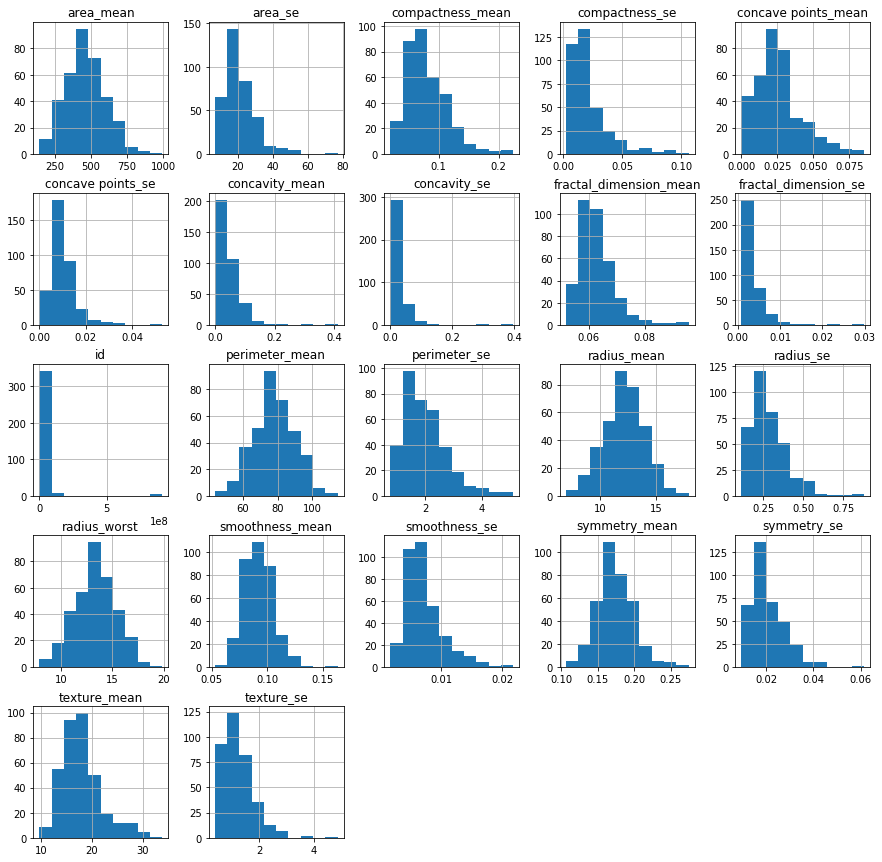

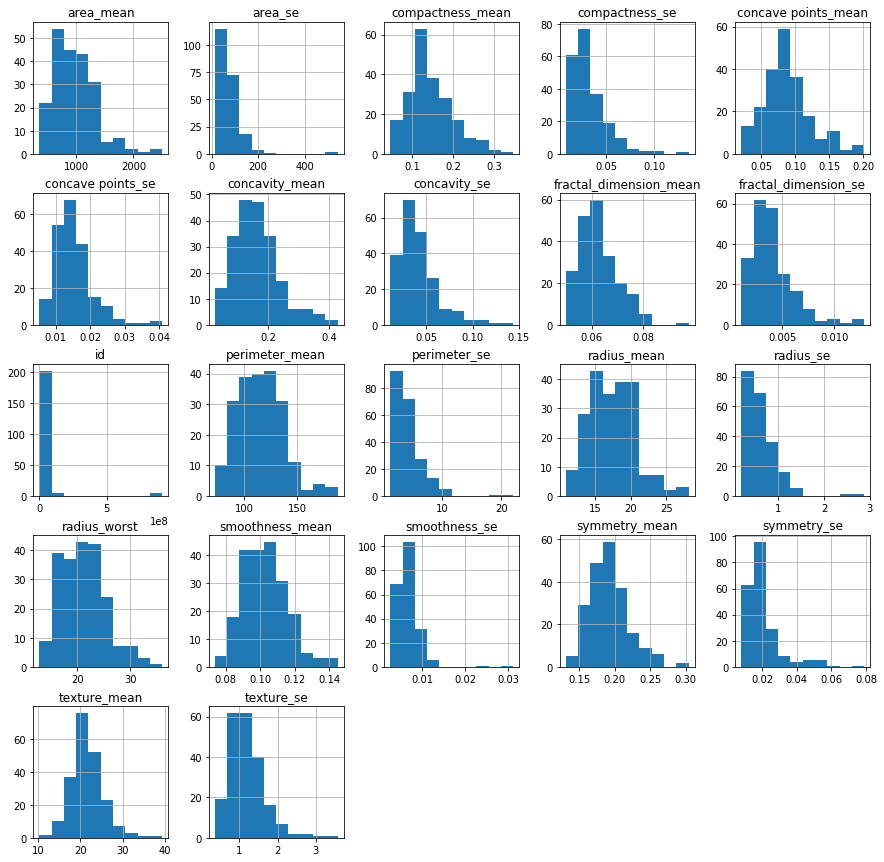

In [7]:
# Visualize dataset
data.groupby('diagnosis').hist(figsize=(15, 15))

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = data.drop(columns=['id','diagnosis'])
y = data['diagnosis'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=1)

#Rescale data 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

## Multilayer Perceptron Classification

In [18]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=0, solver='lbfgs')
mlp.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
    mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.995
Accuracy on test set: 0.972


In [19]:
#Confusion Matrix
y_pred = mlp.predict(X_test_scaled)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[90  0]
 [ 4 49]]


In [20]:
# Precision/Recall
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        90
           1       1.00      0.92      0.96        53

    accuracy                           0.97       143
   macro avg       0.98      0.96      0.97       143
weighted avg       0.97      0.97      0.97       143



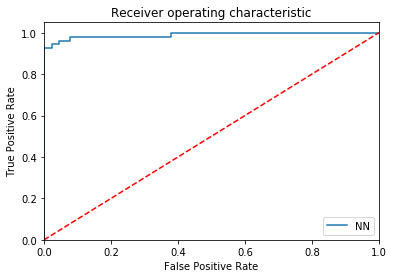

AUC: 0.990


In [21]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
NN_roc_auc = roc_auc_score(y_test, mlp.predict(X_test_scaled))
fpr, tpr, thresholds = roc_curve(y_test, mlp.predict_proba(X_test_scaled)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='NN' % NN_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('RF_ROC')
plt.show()

# calculate AUC

print('AUC: %.3f' % metrics.auc(fpr, tpr))

## Tensorflow DNN Classifier

In [22]:
data.columns = ['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'diagnosis']

In [23]:
cols_to_norm = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 
        'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
        'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst']

In [24]:
data[cols_to_norm] = data[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [25]:
# Specify columns to use to build model
radius_mean = tf.feature_column.numeric_column('radius_mean')
texture_mean = tf.feature_column.numeric_column('texture_mean')
perimeter_mean = tf.feature_column.numeric_column('perimeter_mean')
area_mean = tf.feature_column.numeric_column('area_mean')
smoothness_mean = tf.feature_column.numeric_column('smoothness_mean')
compactness_mean = tf.feature_column.numeric_column('compactness_mean')
concavity_mean = tf.feature_column.numeric_column('concavity_mean')
concave_points_mean = tf.feature_column.numeric_column('concave_points_mean')
symmetry_mean = tf.feature_column.numeric_column('symmetry_mean')
fractal_dimension_mean = tf.feature_column.numeric_column('fractal_dimension_mean')
radius_se = tf.feature_column.numeric_column('radius_se')
texture_se = tf.feature_column.numeric_column('texture_se')
perimeter_se = tf.feature_column.numeric_column('perimeter_se')
area_se = tf.feature_column.numeric_column('area_se')
smoothness_se = tf.feature_column.numeric_column('smoothness_se')
compactness_se = tf.feature_column.numeric_column('compactness_se')
concavity_se = tf.feature_column.numeric_column('concavity_se')
concave_points_se = tf.feature_column.numeric_column('concave_points_se')
symmetry_se = tf.feature_column.numeric_column('symmetry_se')
fractal_dimension_se = tf.feature_column.numeric_column('fractal_dimension_se')
radius_worst = tf.feature_column.numeric_column('radius_worst')

In [26]:
featureColumns = [radius_mean, texture_mean, perimeter_mean, area_mean, smoothness_mean, compactness_mean, concavity_mean, concave_points_mean, 
        symmetry_mean, fractal_dimension_mean, radius_se, texture_se, perimeter_se, area_se, smoothness_se,
        compactness_se, concavity_se, concave_points_se, symmetry_se, fractal_dimension_se, radius_worst]

In [27]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('diagnosis', axis=1),data['diagnosis'],random_state=1)

In [71]:
# Create input function for training model
inputFunction = tf.compat.v1.estimator.inputs.pandas_input_fn(
    x=X_train, 
    y=y_train, 
    batch_size=200, 
    num_epochs=1000, 
    shuffle=True)

In [72]:
# Create DNN object and specify parameters
dnnClassifierModel = tf.estimator.DNNClassifier(hidden_units=[10, 20, 10],
                                                feature_columns=featureColumns,
                                                n_classes=2,
                                                activation_fn=tf.nn.relu,
                                                optimizer=lambda: tf.keras.optimizers.Adam(
                                                    learning_rate=tf.compat.v1.train.exponential_decay(learning_rate=0.001,
                                                    global_step=tf.compat.v1.train.get_global_step(),
                                                    decay_steps=1000,
                                                    decay_rate=0.96)))

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\jmp5118\\AppData\\Local\\Temp\\tmplp9ibq70', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [73]:
dnnClassifierModel.train(input_fn=inputFunction,steps=1000)

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\jmp5118\AppData\Local\Temp\tmplp9ibq70\model.ckpt.
INFO:tensorflow:loss = 0.7034376, step = 0
INFO:tensorflow:global_step/sec: 135.679
INFO:tensorflow:loss = 0.37605172, step = 100 (0.738 sec)
INFO:tensorflow:global_

In [74]:
# Create function to evaluate model performance
evaluateInputFunction = tf.compat.v1.estimator.inputs.pandas_input_fn(
      x=X_test,
      y=y_test,
      batch_size=10,
      num_epochs=1,
      shuffle=False)

scoring = dnnClassifierModel.evaluate(evaluateInputFunction)

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-03-06T22:40:36Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\jmp5118\AppData\Local\Temp\tmplp9ibq70\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.61136s
INFO:tensorflow:Finished evaluation at 2020-03-06-22:40:36
INFO:tensorflow:Saving dict for global step 1000

In [75]:
print(scoring)

{'accuracy': 0.96503496, 'accuracy_baseline': 0.61538464, 'auc': 0.9931819, 'auc_precision_recall': 0.9912368, 'average_loss': 0.10595953, 'label/mean': 0.3846154, 'loss': 0.10206954, 'precision': 0.9464286, 'prediction/mean': 0.40166417, 'recall': 0.96363634, 'global_step': 1000}


In [76]:
# Create confusion matrix for DNNClassifier
labels = list(y_test)
raw_predictions = list(dnnClassifierModel.predict(input_fn=evaluateInputFunction))
predictions = [p['class_ids'][0] for p in raw_predictions]
confusion_matrix = tf.math.confusion_matrix(labels, predictions)
confusion_matrix

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\jmp5118\AppData\Local\Temp\tmplp9ibq70\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[85,  3],
       [ 2, 53]])>